# nvImageCodec with Torch

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import cupy as cp


Import Torch

In [2]:
import torch

Import nvImageCodec

In [3]:
from nvidia import nvimgcodec

Setting resource folder

In [4]:
resources_dir = os.getenv("PYNVIMGCODEC_EXAMPLES_RESOURCES_DIR", "../assets/images/")

Created nvImageCodec Decoder and Encoder

In [5]:
decoder = nvimgcodec.Decoder()
encoder = nvimgcodec.Encoder()

Decode JPEG2000 file 

In [6]:
nv_img = decoder.read(resources_dir + "cat-1046544_640.jp2")

Transfer image to Host memory and display using matplotlib.pyplot

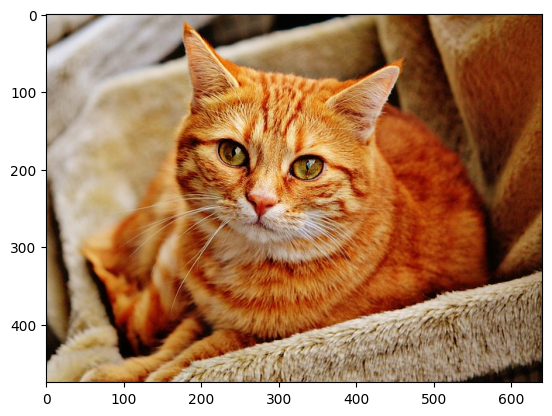

In [7]:
plt.imshow(nv_img.cpu())

## Interoperability between nvImageCodec and Torch using DLPack

Zero-copy convertion of Image to tensor using DLPack

In [8]:
cap = nv_img.to_dlpack()

torch_img = torch.from_dlpack(cap)
print("device:", torch_img.device)
print("dtype of tensor:", torch_img.dtype)

device: cuda:0
dtype of tensor: torch.uint8


Let's flip tensor

In [9]:
torch_img_flip_v = torch.flip(torch_img, dims=[0])

Pass tensor to cuPy and then to numpy to show flipped image

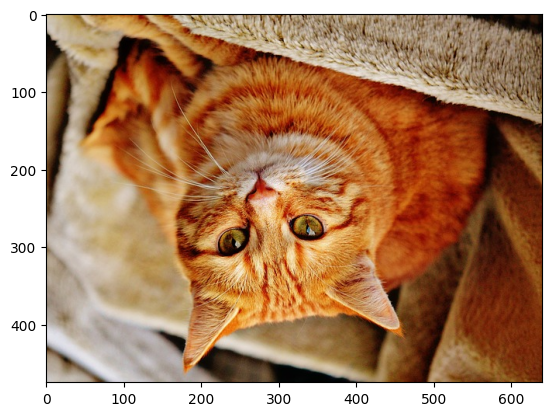

In [10]:
cp_img = cp.from_dlpack(torch.to_dlpack(torch_img_flip_v))
np_img = cp.asnumpy(cp_img)
plt.imshow(np_img)

Zero-copy convertion of  tensor back to (nvImageCodec) Image

In [11]:
cap = torch.to_dlpack(torch_img_flip_v)
nv_flipped_img_v = nvimgcodec.as_image(cap)

Save as Jpeg2000

In [12]:
encoder.write("torch_flipped_v.j2k", nv_flipped_img_v)

'torch_flipped_v.j2k'

Load with OpenCV to verify

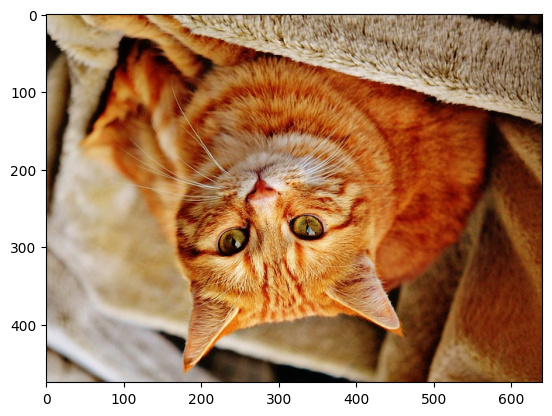

In [13]:
image = cv2.imread("torch_flipped_v.j2k")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Interoperability between nvImageCodec and Torch using \_\_cuda\_array\_interface\_\_

Pass nvImageCodec Image to torch without copy using \_\_cuda\_array\_interface\_\_

In [14]:
print(nv_img.__cuda_array_interface__)
torch_tensor = torch.as_tensor(nv_img)
print(torch_tensor.__cuda_array_interface__)

{'shape': (475, 640, 3), 'strides': None, 'typestr': '|u1', 'data': (64424509440, False), 'version': 3, 'stream': 1}
{'typestr': '|u1', 'shape': (475, 640, 3), 'strides': None, 'data': (64424509440, False), 'version': 2}


Flip tensor horizontally

In [15]:
torch_img_flip_h = torch.flip(torch_img, dims=[1])

Pass tensor to cuPy and then to numpy to show flipped image

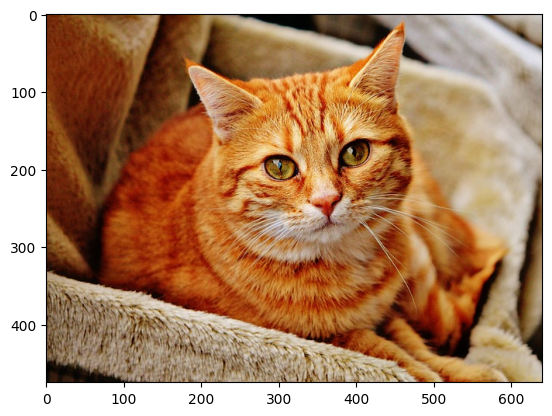

In [16]:
cp_img = cp.asarray(torch_img_flip_h)
np_img = cp.asnumpy(cp_img)
plt.imshow(np_img)

Zero-copy convertion of  tensor back to Image  

In [17]:
nv_flipped_img_h = nvimgcodec.as_image(torch_img_flip_h)

Save as Jpeg2000

In [18]:
encoder = nvimgcodec.Encoder()
encoder.write("torch_flipped_h.j2k", nv_flipped_img_h)

'torch_flipped_h.j2k'

Load with OpenCV to verify

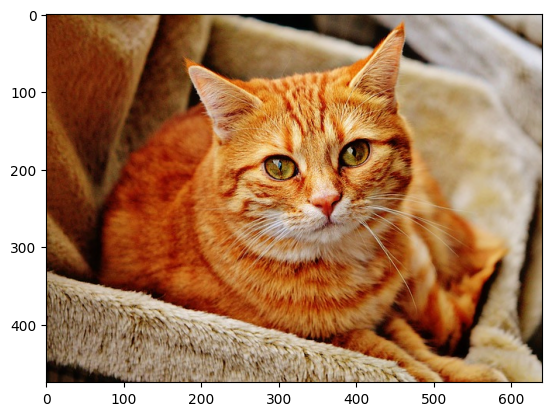

In [19]:
image = cv2.imread("torch_flipped_h.j2k")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Simplified version by passing  troch tensor directly to `write` function

Convert nvImageCodec Image to tensor and flip in both axis using torch

In [20]:
torch_img_flip_vh = torch.flip(torch.as_tensor(nv_img), dims=[0,1])

There is possibilty to pass torch tensor directly to write or encode funcion

In [21]:
encoder.write("torch_flipped_vh.j2k", torch_img_flip_vh)

'torch_flipped_vh.j2k'

Pass it back to nvImageCodec

In [22]:
nv_img_vh = nvimgcodec.as_image(torch_img_flip_vh)

Transfer to CPU and display

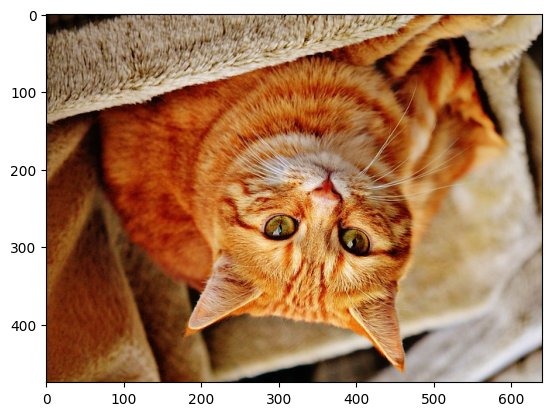

In [23]:
plt.imshow(nv_img_vh.cpu())